In [94]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')
tavily_key = os.getenv('TAVILY_API_KEY')

In [95]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [96]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage
from langchain_teddynote.tools.tavily import TavilySearch
from langgraph.prebuilt import ToolNode, tools_condition

In [97]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [98]:
tool = TavilySearch(api_key=tavily_key, max_results=1)
tools = [tool]

In [99]:
llm = ChatOpenAI(
    api_key=key, 
    model='gpt-4o-mini'
)

In [100]:
llm_with_tools = llm.bind_tools(tools=tools)

In [101]:
def chatbot(state: State):
    answer = llm_with_tools.invoke(state['messages'])
    return {'messages': [answer]}

In [102]:
question = HumanMessage(content='2025년 이란과 이스라엘 전쟁')
state1 = State(messages=[question])
result = chatbot(state1)

In [103]:
result['messages'][0]

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CgPa3YGNpEuv31RK6o3YQtbN', 'function': {'arguments': '{"query":"2025 Iran Israel war"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 103, 'total_tokens': 124, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4db8a878-eebd-420f-a983-da7e25470854-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '2025 Iran Israel war'}, 'id': 'call_CgPa3YGNpEuv31RK6o3YQtbN', 'type': 'tool_call'}], usage_metadata={'input_tokens': 103, 'output_tokens': 21, 'total_tokens': 124, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outp

In [104]:
result['messages'][0].content

''

In [105]:
result['messages'][0].additional_kwargs

{'tool_calls': [{'id': 'call_CgPa3YGNpEuv31RK6o3YQtbN',
   'function': {'arguments': '{"query":"2025 Iran Israel war"}',
    'name': 'tavily_web_search'},
   'type': 'function'}],
 'refusal': None}

In [106]:
result['messages'][0].response_metadata

{'token_usage': {'completion_tokens': 21,
  'prompt_tokens': 103,
  'total_tokens': 124,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_34a54ae93c',
 'finish_reason': 'tool_calls',
 'logprobs': None}

In [107]:
result['messages'][0].tool_calls

[{'name': 'tavily_web_search',
  'args': {'query': '2025 Iran Israel war'},
  'id': 'call_CgPa3YGNpEuv31RK6o3YQtbN',
  'type': 'tool_call'}]

In [108]:
result['messages'][0].tool_calls[0]['name']

'tavily_web_search'

In [109]:
result['messages'][0].tool_calls[0]['args']

{'query': '2025 Iran Israel war'}

In [110]:
graph_builder = StateGraph(State)

In [111]:
graph_builder.add_node('chatbot', chatbot)      # 챗봇 노드 추가

In [112]:
tool_node = ToolNode(tools=[tool])              # 도구 노드 생성

In [113]:
graph_builder.add_node('tools', tool_node)      # 도구 노드 추가

In [114]:
graph_builder.add_conditional_edges(
    'chatbot', 
    tools_condition
)

In [115]:
graph_builder.add_edge(START, 'chatbot')

In [116]:
graph_builder.add_edge('tools', 'chatbot')

In [117]:
graph_builder.add_edge('chatbot', END)

In [118]:
graph = graph_builder.compile()

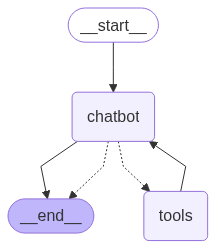

In [119]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [120]:
input_message = HumanMessage(content='대한민국의 수도는 어디야?')
answer = graph.invoke({'messages': [input_message]})

In [121]:
answer

{'messages': [HumanMessage(content='대한민국의 수도는 어디야?', additional_kwargs={}, response_metadata={}, id='cc343f58-282a-444a-9af8-e856c875c08b'),
  AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 99, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'stop', 'logprobs': None}, id='run-c74f14d6-1ba2-4118-abcf-258d77b43cf9-0', usage_metadata={'input_tokens': 99, 'output_tokens': 9, 'total_tokens': 108, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [123]:
input_message = HumanMessage(content='대구 동성로 떡볶이')
answer = graph.invoke({'messages': [input_message]})

In [124]:
answer

{'messages': [HumanMessage(content='대구 동성로 떡볶이', additional_kwargs={}, response_metadata={}, id='fac3bb20-3da6-4731-bef6-f5dcf7f746a2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xGwMMvCBtZ0TOmYSvmCoAwzX', 'function': {'arguments': '{"query":"대구 동성로 떡볶이"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 101, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-aa4ac514-8ce8-4575-bc55-636751d64595-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '대구 동성로 떡볶이'}, 'id': 'call_xGwMMvCBtZ0TOmYSvmCoAwzX', 'type': 'tool_call'}], usage_metadata={'in

In [125]:
input_message = HumanMessage(content='2025 g7 정상회의')
answer = graph.invoke({'messages': [input_message]})

In [126]:
answer

{'messages': [HumanMessage(content='2025 g7 정상회의', additional_kwargs={}, response_metadata={}, id='0c5b2ab0-9a6c-4f9d-a648-1ffcc858363e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xfTalpyeexWz09Q039R1TAAI', 'function': {'arguments': '{"query":"2025 G7 정상회의"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 97, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-df906550-45dd-4c85-a40d-001c473c9fb9-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '2025 G7 정상회의'}, 'id': 'call_xfTalpyeexWz09Q039R1TAAI', 'type': 'tool_call'}], usage_metadata

In [129]:
answer['messages'][-1].content

'2025 G7 정상회의는 캐나다 앨버타주 카나나스키스에서 개최될 예정입니다. 이 회의는 2025년 6월 15일부터 17일까지 진행되며, 글로벌 경제 회복, 인공지능 규범 설정, 기후 변화 대응, 공급망 안정 등 다양한 주요 의제를 다룰 계획입니다.\n\n정상회의에는 G7 정회원국 외에도 대한민국, 인도, 브라질 등의 주요 신흥국이 초청국으로 참여합니다. 이로 인해 국제 외교 무대에서 새로운 균형을 기대할 수 있습니다. 특히, 이재명 대통령의 첫 G7 정상 무대 데뷔가 예정되어 있어 한국의 외교적 위상 강화를 나타내는 중요한 기회가 될 것입니다.\n\n자세한 내용은 [여기서 확인하실 수 있습니다](https://ha.ggiovaraca.com/entry/2025-G7-정상회의-초청국·참가국-일정-총정리).'

In [130]:
input_message = HumanMessage(content='2025 g7 정상회의')

for chunk in graph.stream({'messages': [input_message]}, stream_mode='values'):
    # 각 단계의 현재 상태 값 출력
    # print(chunk)

    for state_key, state_value in chunk.items():
        if state_key == "messages":
            state_value[-1].pretty_print()

================================ Human Message =================================

2025 g7 정상회의
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (call_fi27S6IRzC7RGrZCbzGJMAYT)
 Call ID: call_fi27S6IRzC7RGrZCbzGJMAYT
  Args:
    query: 2025 G7 정상회의
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "2025 G7 정상회의 초청국·참가국 일정 총정리", "url": "https://ha.ggiovaraca.com/entry/2025-G7-정상회의-초청국·참가국-일정-총정리", "content": "2025 G7 정상회의 초청국·참가국 일정 총정리 전 세계 주요 7개국(G7)이 모이는 **2025 G7 정상회의**가 캐나다 앨버타주 **카나나스키스**에서 개최됩니다. Image 4: 2025 G7 정상회의 초청국·참가국 일정 총정리 Image 5: 2025 G7 정상회의 초청국&middot;참가국 일정 총정리Image 6Image 7 *   🇮🇳 인도 – 총리 나렌드라 모디 (G7 + 4 선진국 구도 강화 차원) Image 8Image 9: 2025 G7 정상회의 초청국&middot;참가국 일정 총정리Image 10 Image 11: 2025 G7 정상회의 초청국&middot;참가국 일정 총정리Image 12Image 13 Image 14: 2025 G7 정상회의 초청국&middot;참가국 일정 총정리Image 15Image 16 Image 17: 2025 G7 정상회의 초청국&middot;참가국 일정 